# BGG Stats

There are a lot of different themes of board games.  Two of the most popular themes are Science Fiction and Fantasy.  The question that I have is if there is a statistical difference between the two themes average score or geek score.

### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys
sys.path.append("../data/")

In [2]:
df = pd.read_csv('../data/bgg_2.csv')

### Data Prep

In [3]:
# Create series with fantasy or scifi games
fantasy = df[['game_id', 'Fantasy']]
scifi = df[['game_id', 'Science Fiction']]

fantasy = fantasy[fantasy['Fantasy'] > 0]
f_game_id = fantasy.game_id.values

scifi = scifi[scifi['Science Fiction'] > 0]
s_game_id = scifi.game_id.values

df_fantasy = df.loc[df['game_id'].isin(f_game_id)]
fantasy_avg = df_fantasy['avg_rating']
fantasy_geek = df_fantasy['geek_rating']

df_scifi = df.loc[df['game_id'].isin(s_game_id)]
scifi_avg = df_scifi['avg_rating']
scifi_geek = df_scifi['geek_rating']

In [4]:
print('Avg rating for Fantasy game: {:.3f}'.format(df_fantasy['avg_rating'].mean()))
print('Avg rating for SciFi game: {:.3f}'.format(df_scifi['avg_rating'].mean()))

print('Geek Avg rating for Fantasy game: {:.3f}'.format(df_fantasy['geek_rating'].mean()))
print('Geek Avg rating for SciFi game: {:.3f}'.format(df_scifi['geek_rating'].mean()))

Avg rating for Fantasy game: 7.044
Avg rating for SciFi game: 7.103
Geek Avg rating for Fantasy game: 6.182
Geek Avg rating for SciFi game: 6.198


We see that the avg_rating and geek_rating between Fantasy and SciFi board games are very close.  Using bootstrp replicates we will see if there is a statistical difference between the two.

The null hypothesis is that there is no difference betweent the two themes of board games while hypothesis claims there is a difference.

H0 = fantasy ratings = scifi ratings OR fantasy ratings - scifi ratings = 0

Ha = fantasy ratings != scifi ratings

### Bootstrap

In [5]:
# DataQuest bootstrap functions
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, len(data)))

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

In [6]:
# Bootstrap 10,000 replicates of the mean()
bs_mean_fantasy_avg = draw_bs_reps(fantasy_avg, np.mean, 10000)
bs_mean_fantasy_geek = draw_bs_reps(fantasy_geek, np.mean, 10000)

bs_mean_scifi_avg = draw_bs_reps(scifi_avg, np.mean, 10000)
bs_mean_scifi_geek = draw_bs_reps(scifi_geek, np.mean, 10000)

In [7]:
# difference of means
bs_mean_diff_avg = bs_mean_fantasy_avg - bs_mean_scifi_avg
bs_mean_diff_geek = bs_mean_fantasy_geek - bs_mean_scifi_geek

# 95% confidence interval
conf_int_95_avg = np.percentile(bs_mean_diff_avg, [2.5, 97.5])
conf_int_95_geek = np.percentile(bs_mean_diff_geek, [2.5, 97.5])

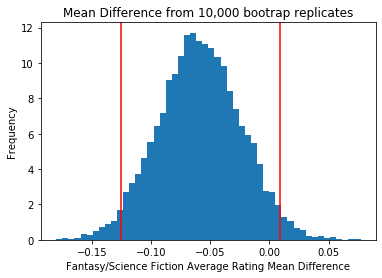

In [8]:
plt.hist(bs_mean_diff_avg, density=True, bins=50)
plt.axvline(x=conf_int_95_avg[0], color='r')
plt.axvline(x=conf_int_95_avg[1], color='r')
plt.xlabel('Fantasy/Science Fiction Average Rating Mean Difference')
plt.ylabel('Frequency')
plt.title('Mean Difference from 10,000 bootrap replicates')
plt.savefig('../figures/bbg_3-fig_1.jpeg');

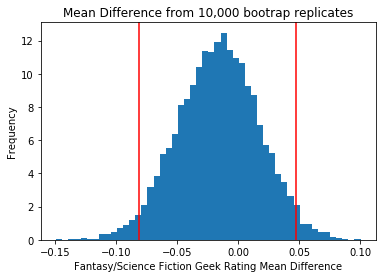

In [9]:
plt.hist(bs_mean_diff_geek, density=True, bins=50)
plt.axvline(x=conf_int_95_geek[0], color='r')
plt.axvline(x=conf_int_95_geek[1], color='r')
plt.xlabel('Fantasy/Science Fiction Geek Rating Mean Difference')
plt.ylabel('Frequency')
plt.title('Mean Difference from 10,000 bootrap replicates')
plt.savefig('../figures/bbg_3-fig_2.jpeg');

### Conclution
The above histograms is the mean difference in bootstap deviation of 10,000 samples.  The red lines mark the 95% confidenc interval.  We see that the 95% confidence interval does contain 0 on both avg_rating and geek_rating.  This means we can accept the null hypothesis that the avg_rating and geek_rating of the themes Fantasy and SciFi have no statitical difference.